# NEVADA Airbnb Analysis

### The Clark County, Nevada, USA Airbnb Open Dataset is chosen from http://insideairbnb.com/get-the-data/  
### The analysis is for the UDACITY Project: Write a Data Science Blog Post

The 6 steps of CRISP-DM  
(**Cr**oss-**I**ndustry **S**tandard **P**rocess for **D**ata **M**ining):

1.0 Business Understanding  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   2.0 Data Understading  
3.0 Data Preperation        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   4.0 Modelling  
5.0 Evaluation              &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   6.0 Deployment  

The Summary at the bottom tries to investigate the following 3 questions.  
a) How is the median price change with different types of housing available?  
b) Which area of the Clark County median price is the lowest?  
c) In the area the median price is lower, how the price fluctuates throughout the year?  

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":8,"axes.labelsize":30})   
pal =  sns.set_palette(sns.color_palette("Paired"))

### Gather Dataset

The repository includes 3 CSV files and following 2 files were used in the analysis below.  
**calendar.csv** : The pricing for each listing id for certain days.  
**listings.csv** : detailed description of each listing id.   

In [2]:
# http://insideairbnb.com/get-the-data/
listings_df = pd.read_csv('data/listings.csv')
calendar_df = pd.read_csv('data/calendar.csv')

In [3]:
# shape of the data sets
print(f'\n Number of:    Rows     Columns \n Listings:     {listings_df.shape[0]}    {listings_df.shape[1]} \n \
Calander:   {calendar_df.shape[0]}    {calendar_df.shape[1]} ')


 Number of:    Rows     Columns 
 Listings:     11791    74 
 Calander:   4303715    7 


In [4]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11791 entries, 0 to 11790
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11791 non-null  int64  
 1   listing_url                                   11791 non-null  object 
 2   scrape_id                                     11791 non-null  int64  
 3   last_scraped                                  11791 non-null  object 
 4   name                                          11791 non-null  object 
 5   description                                   11363 non-null  object 
 6   neighborhood_overview                         6763 non-null   object 
 7   picture_url                                   11791 non-null  object 
 8   host_id                                       11791 non-null  int64  
 9   host_url                                      11791 non-null 

In [5]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303715 entries, 0 to 4303714
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           object
 4   adjusted_price  object
 5   minimum_nights  int64 
 6   maximum_nights  int64 
dtypes: int64(3), object(4)
memory usage: 229.8+ MB


## 3. Handle Missing data and Categorical Data

#### First plot each dataframe notnullvalues to get a idea about missing and null values

#### Calculate NOT NULL data precentage(%) in each column

## Figure 1

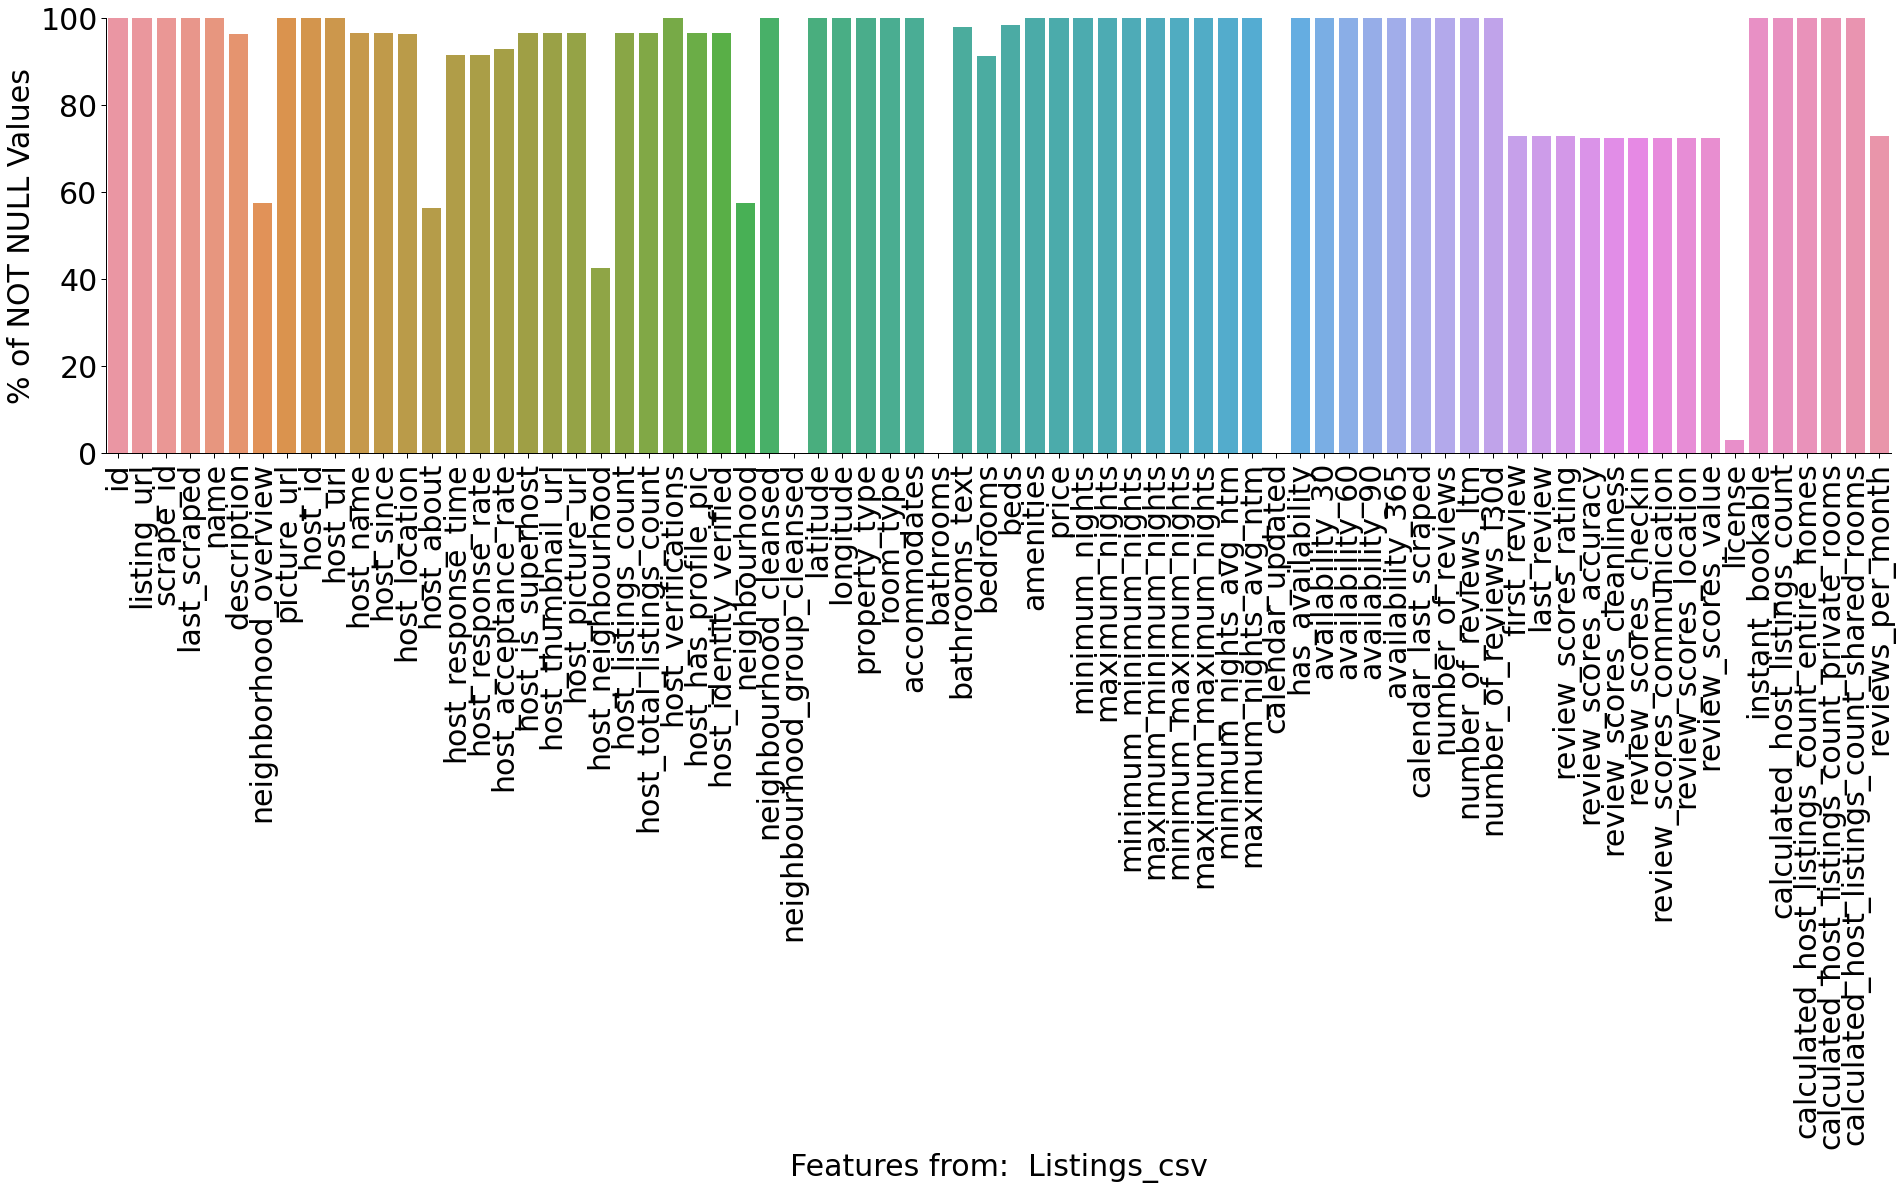

In [6]:
listing_null = ((listings_df.notnull().mean())*100).to_frame().reset_index()
listing_null.columns = ['index', 'prece']

plt.figure(figsize=(32,8))
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.ylim(0,100)
ax = sns.barplot(x='index', y='prece', data=listing_null, palette=pal)
sns.despine()
ax.set_xlabel('Features from:  Listings_csv', fontsize=30)
ax.set_ylabel('% of NOT NULL Values', fontsize=30)

#plt.tight_layout()
plt.savefig('Fig_1.png', bbox_inches='tight')
plt.show()


## Figure 2

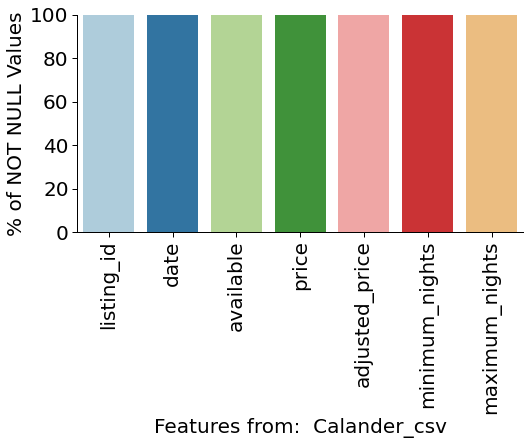

In [7]:
calander_null = ((calendar_df.notnull().mean())*100).to_frame()
calander_null = calander_null.reset_index()
calander_null.columns = ['index', 'prece']

plt.figure(figsize=(8,4))
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,100)
ax = sns.barplot(x='index', y='prece', data=calander_null, palette=pal)
sns.despine()
ax.set_xlabel('Features from:  Calander_csv', fontsize=20)
ax.set_ylabel('% of NOT NULL Values', fontsize=20)
#plt.tight_layout()
#plt.savefig('Fig_2.png', bbox_inches='tight')
plt.show()

Looks like in the **Listings_csv** dataset neighbourhood_group_cleansed, bathrooms, calendar_updated columns all rows are NULL.  
Therefore, we can ignore and drop these 3 columns.   
The feature we are interested 'Price' does not include any rows with Null values.  

In [8]:
# Remove the $ sign from the calendar_df.price. column
calendar_df['price_US_dollars'] = calendar_df.price.replace({'[\$,]':''}, regex=True).astype(float)

In [9]:
# Extract month with year
calendar_df['month_year'] = pd.to_datetime(calendar_df['date']).dt.to_period('M')

### Need to merge "['neighbourhood_cleansed', 'property_type', 'room_type', 'bedrooms', 'beds', 'bathrooms_text', 'number_of_reviews']" from listings_df with the calander_df 

In [10]:
### Create joined dataframe with listings_df and calander_df
calander_neighborhood_df = calendar_df.merge(listings_df[['neighbourhood_cleansed', 'property_type', 'room_type', 'bedrooms', 'beds', 'bathrooms_text', 'number_of_reviews']], how='left', left_on=calendar_df['listing_id'], right_on=listings_df['id'] )
calander_neighborhood_df.head() 

,key_0,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,price_US_dollars,month_year,neighbourhood_cleansed,property_type,room_type,bedrooms,beds,bathrooms_text,number_of_reviews
0,27082775,27082775,2021-12-18,f,$36.00,$36.00,31,1125,36.0,2021-12,Unincorporated Areas,Private room in residential home,Private room,1.0,1.0,1 private bath,3
1,26373705,26373705,2021-12-18,f,$121.00,$121.00,1,28,121.0,2021-12,Unincorporated Areas,Room in hotel,Private room,NaN,1.0,1 bath,63
2,26373705,26373705,2021-12-19,t,$99.00,$99.00,1,28,99.0,2021-12,Unincorporated Areas,Room in hotel,Private room,NaN,1.0,1 bath,63
3,26373705,26373705,2021-12-20,t,$99.00,$99.00,1,28,99.0,2021-12,Unincorporated Areas,Room in hotel,Private room,NaN,1.0,1 bath,63
4,27082775,27082775,2021-12-19,f,$36.00,$36.00,31,1125,36.0,2021-12,Unincorporated Areas,Private room in residential home,Private room,1.0,1.0,1 private bath,3


### Check for NaN values in the created new dataframe.
### Calculate the precentage of not null values for each column.

In [11]:
listing_null = ((calander_neighborhood_df.notnull().mean())*100).to_frame().reset_index()
listing_null.columns = ['index', '% Not Null']
listing_null

,index,% Not Null
0,key_0,100.000000
1,listing_id,100.000000
2,date,100.000000
3,available,100.000000
4,price,99.995701
5,adjusted_price,99.995701
6,minimum_nights,100.000000
7,maximum_nights,100.000000
8,price_US_dollars,99.995701
9,month_year,100.000000


### Remove NaN values and verify don't have any in each column

In [12]:
calander_neighborhood_df = calander_neighborhood_df.dropna()

listing_null = ((calander_neighborhood_df.notnull().mean())*100).to_frame().reset_index()
listing_null.columns = ['index', '% Not Null']
listing_null

,index,% Not Null
0,key_0,100.0
1,listing_id,100.0
2,date,100.0
3,available,100.0
4,price,100.0
5,adjusted_price,100.0
6,minimum_nights,100.0
7,maximum_nights,100.0
8,price_US_dollars,100.0
9,month_year,100.0


### Get only records with 'available' feature set to 'True'

In [13]:
### get only records with 'available=T'
combined_availa_T_df = calander_neighborhood_df[calander_neighborhood_df.available=='t']
len(combined_availa_T_df)

1848354

In [14]:
combined_availa_T_df.describe()

,key_0,listing_id,minimum_nights,maximum_nights,price_US_dollars,bedrooms,beds,number_of_reviews
count,1.848354e+06,1.848354e+06,1.848354e+06,1.848354e+06,1.848354e+06,1.848354e+06,1.848354e+06,1.848354e+06
mean,4.043884e+07,4.043884e+07,9.215325e+00,4.166563e+05,3.395243e+02,2.132894e+00,3.117386e+00,2.431061e+01
std,1.391196e+07,1.391196e+07,1.959674e+01,2.988386e+07,8.263365e+02,1.447292e+00,2.512528e+00,5.205227e+01
min,4.449500e+04,4.449500e+04,1.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.169696e+07,3.169696e+07,2.000000e+00,1.820000e+02,9.900000e+01,1.000000e+00,1.000000e+00,0.000000e+00
50%,4.579130e+07,4.579130e+07,2.000000e+00,1.125000e+03,1.900000e+02,2.000000e+00,2.000000e+00,4.000000e+00
75%,5.185580e+07,5.185580e+07,5.000000e+00,1.125000e+03,3.310000e+02,3.000000e+00,4.000000e+00,2.200000e+01
max,5.387990e+07,5.387990e+07,3.650000e+02,2.147484e+09,2.500000e+04,1.600000e+01,2.700000e+01,6.690000e+02


In [15]:
combined_availa_T_df.head()

,key_0,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,price_US_dollars,month_year,neighbourhood_cleansed,property_type,room_type,bedrooms,beds,bathrooms_text,number_of_reviews
183,27082775,27082775,2022-02-05,t,$36.00,$36.00,31,1125,36.0,2022-02,Unincorporated Areas,Private room in residential home,Private room,1.0,1.0,1 private bath,3
184,27082775,27082775,2022-02-06,t,$36.00,$36.00,31,1125,36.0,2022-02,Unincorporated Areas,Private room in residential home,Private room,1.0,1.0,1 private bath,3
185,27082775,27082775,2022-02-07,t,$36.00,$36.00,31,1125,36.0,2022-02,Unincorporated Areas,Private room in residential home,Private room,1.0,1.0,1 private bath,3
186,27082775,27082775,2022-02-08,t,$36.00,$36.00,31,1125,36.0,2022-02,Unincorporated Areas,Private room in residential home,Private room,1.0,1.0,1 private bath,3
187,27082775,27082775,2022-02-09,t,$36.00,$36.00,31,1125,36.0,2022-02,Unincorporated Areas,Private room in residential home,Private room,1.0,1.0,1 private bath,3


In [16]:
#sns.palplot(sns.diverging_palette(220, 20, n=7))

In [17]:
#pal =  sns.set_palette(sns.diverging_palette(220, 20, n=7))

## Figure 3

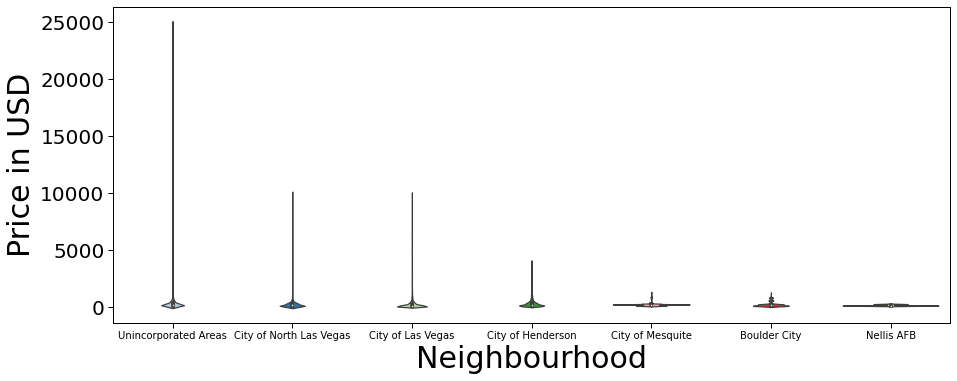

In [18]:
plt.figure(figsize=(14,6))
ax = sns.violinplot(y="price_US_dollars", x="neighbourhood_cleansed", data=combined_availa_T_df, annot_kws={"size": 20},)
ax.set_xlabel("Neighbourhood")
ax.set_ylabel("Price in USD")

plt.xticks(fontsize=10)
plt.yticks(fontsize=20)

plt.tight_layout()
# plt.xlabel(fontsize = 20)
# plt.ylabel(fontsize = 20)
#plt.savefig('Fig_3.png', bbox_inches='tight')
plt.show()

In [19]:
print(f' The mean value of the feature :price_US_dollars in the DataFrame = {combined_availa_T_df["price_US_dollars"].mean():.2f}')

 The mean value of the feature :price_US_dollars in the DataFrame = 339.52


## Use only values less than above mean values in the analysis

## Figure 4

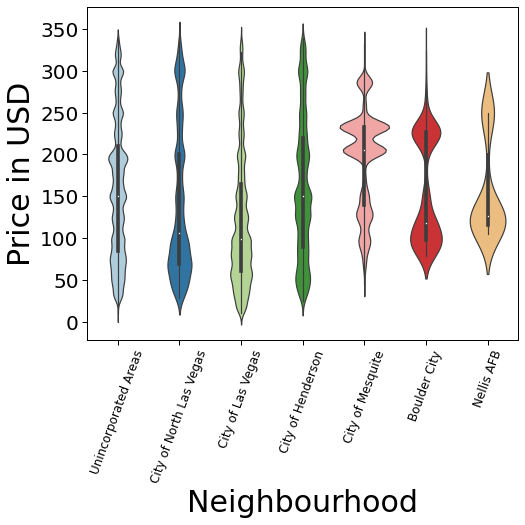

In [20]:
plt.figure(figsize=(8,8))
less_mean_df = combined_availa_T_df[combined_availa_T_df["price_US_dollars"] <= combined_availa_T_df["price_US_dollars"].mean()]
ax = sns.violinplot(y="price_US_dollars", x="neighbourhood_cleansed", data=less_mean_df)
ax.set_xlabel("Neighbourhood")
ax.set_ylabel("Price in USD")

plt.xticks(fontsize=12, rotation = 70)
plt.yticks(fontsize=20)

plt.tight_layout()
# plt.xlabel(fontsize
plt.savefig('Fig_4.png', bbox_inches='tight')
plt.show()

## Figure 5

In [21]:
colors =["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
pal_2 = sns.color_palette("Set2")

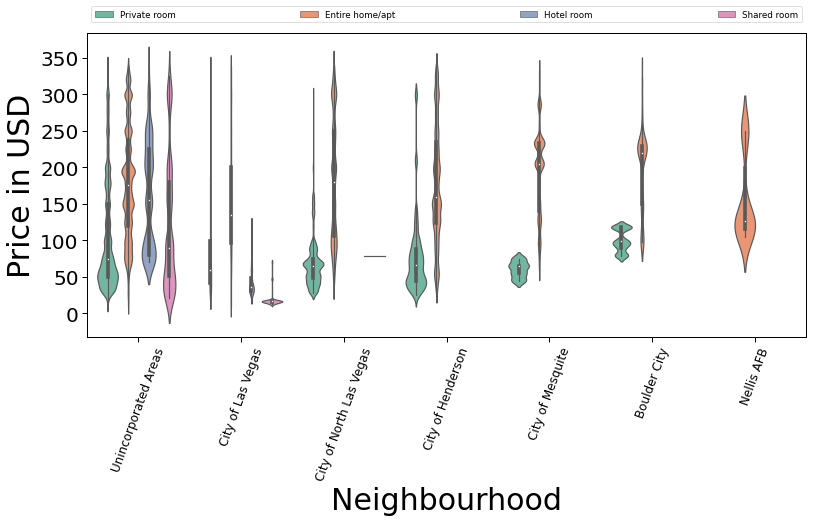

In [22]:
plt.figure(figsize=(12,8))
#less_mean_df = combined_availa_T_df[combined_availa_T_df["price_US_dollars"] <= combined_availa_T_df["price_US_dollars"].mean()]
sort_bath = less_mean_df.sort_values('bathrooms_text')
ax = sns.violinplot(y="price_US_dollars", x="neighbourhood_cleansed", hue='room_type', data=sort_bath, palette=pal_2)

ax.set_xlabel("Neighbourhood")
ax.set_ylabel("Price in USD")

plt.xticks(fontsize=12, rotation = 70)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(0, 1.02, 1.0,0.2), loc="lower left", mode="expand", ncol=8)
plt.tight_layout()
plt.savefig('Fig_5.png', bbox_inches='tight')
plt.show()

## Figure 6

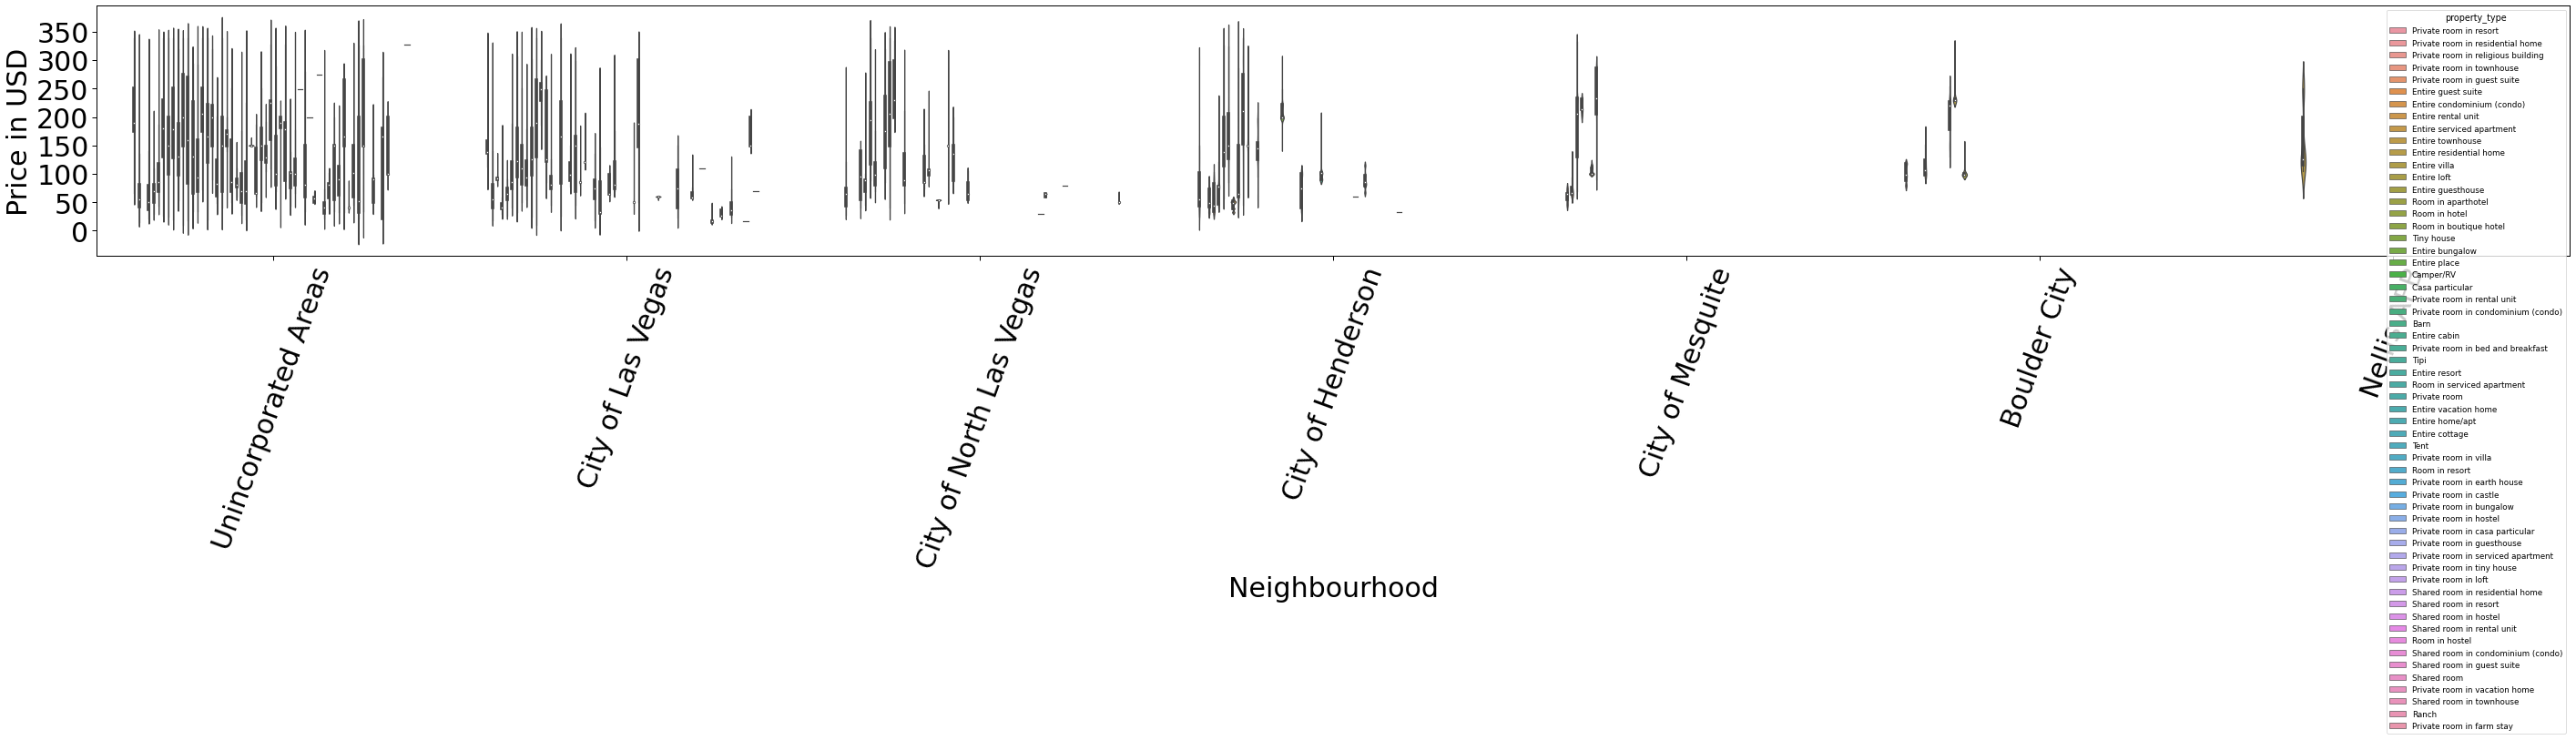

In [23]:
plt.figure(figsize=(40,10))
less_mean_df = combined_availa_T_df[combined_availa_T_df["price_US_dollars"] <= combined_availa_T_df["price_US_dollars"].mean()]
sort_bath = less_mean_df.sort_values('bathrooms_text')
ax = sns.violinplot(y="price_US_dollars", x="neighbourhood_cleansed", hue='property_type', data=sort_bath)

ax.set_xlabel("Neighbourhood")
ax.set_ylabel("Price in USD")

plt.xticks(fontsize=30, rotation = 70)
plt.yticks(fontsize=30)

plt.tight_layout()
#plt.savefig('Fig_6.png', bbox_inches='tight')
plt.show()

## Figure 7

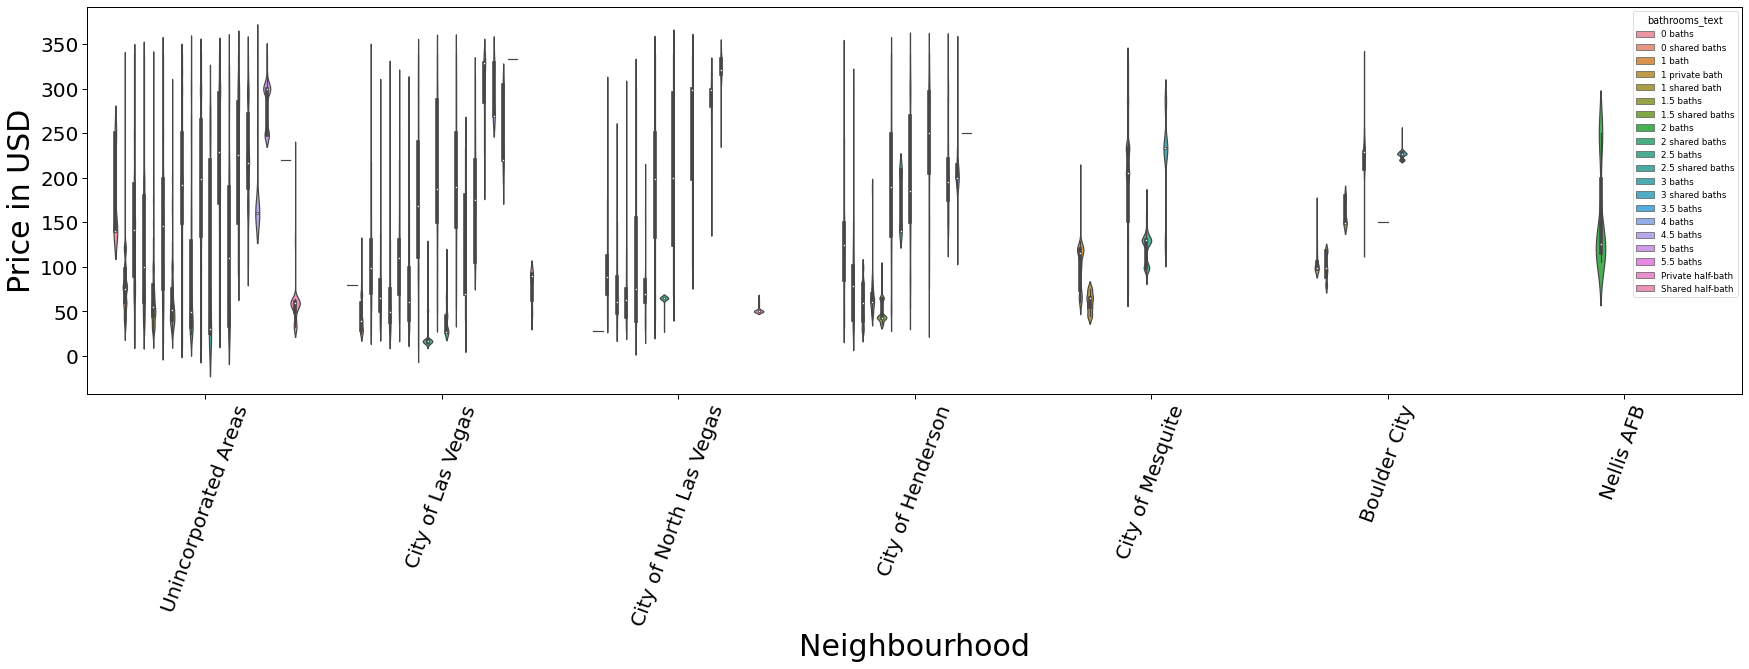

In [24]:

plt.figure(figsize=(25,10))
# less_mean_df = combined_availa_T_df[combined_availa_T_df["price_reformat"] <= combined_availa_T_df["price_reformat"].mean()]
# sort_bath = less_mean_df.sort_values('bathrooms_text')
ax = sns.violinplot(y="price_US_dollars", x='neighbourhood_cleansed',hue="bathrooms_text", data=sort_bath)

ax.set_xlabel("Neighbourhood")
ax.set_ylabel("Price in USD")

plt.xticks(fontsize=20, rotation = 70)
plt.yticks(fontsize=20)

plt.tight_layout()
#plt.savefig('Fig_7.png', bbox_inches='tight')
plt.show()

In [25]:
# plt.figure(figsize=(20,10))
# # less_mean_df = combined_availa_T_df[combined_availa_T_df["price_US_dollars"] <= combined_availa_T_df["price_US_dollars"].mean()]
# # sort_bath = less_mean_df.sort_values('bathrooms_text')
# ax = sns.violinplot(x="price_US_dollars", y="property_type", hue='room_type', data=sort_bath)

In [26]:
# df_zero_count = (combined_availa_T_df[combined_availa_T_df["price_US_dollars"]==0]).groupby(['neighbourhood_cleansed']).count()
# df_zero_count

In [27]:
# plt.figure(figsize=(25,5))
# #fig, axes = plt.subplots(1,12, figsize=(12,60))
# #less_mean_df = calander_neighborhood_df[calander_neighborhood_df["price_reformat"] <= calander_neighborhood_df["price_reformat"].mean()]
# less_mean_df = less_mean_df.sort_values('month_year')
# less_mean_df['month_year'] = [str(x) for x in less_mean_df['month_year']]
# sns.violinplot(x="month_year", y="price_US_dollars", hue="neighbourhood_cleansed", data=less_mean_df)

## Figure 8

In [28]:
pal_3 =sns.color_palette("Paired")

In [29]:
less_mean_df = less_mean_df.sort_values('month_year')

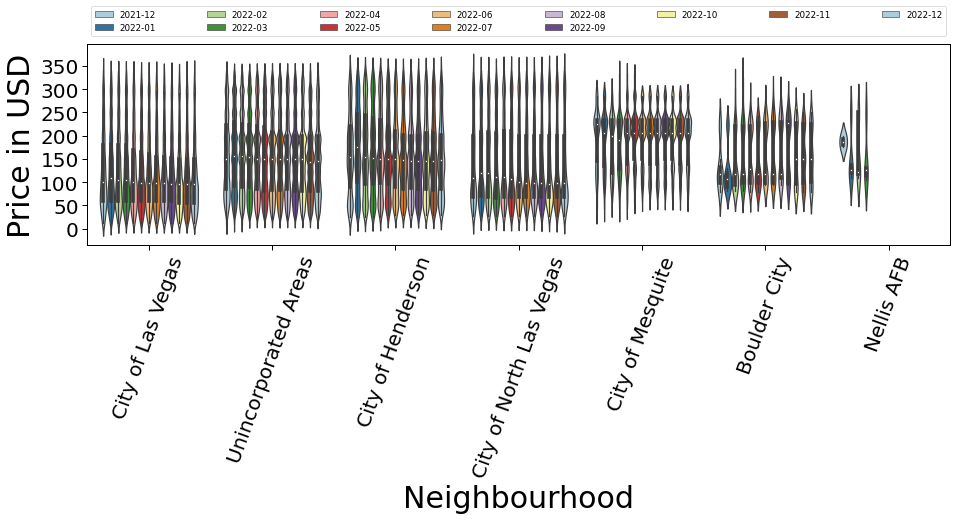

In [30]:
plt.figure(figsize=(14,8))
#fig, axes = plt.subplots(1,12, figsize=(12,60))
#less_mean_df = calander_neighborhood_df[calander_neighborhood_df["price_reformat"] <= calander_neighborhood_df["price_reformat"].mean()]
less_mean_df['month_year'] = [str(x) for x in less_mean_df['month_year']]
ax = sns.violinplot(x="neighbourhood_cleansed", y="price_US_dollars", hue="month_year", data=less_mean_df, palette=pal_3)

ax.set_xlabel("Neighbourhood")
ax.set_ylabel("Price in USD")

plt.xticks(fontsize=20, rotation = 70)
plt.yticks(fontsize=20)

plt.legend(bbox_to_anchor=(0, 1.02, 1.0,0.2), loc="lower left", mode="expand", ncol=8)
plt.tight_layout()
plt.savefig('Fig_8.png', bbox_inches='tight')
plt.show()

## Figure 9

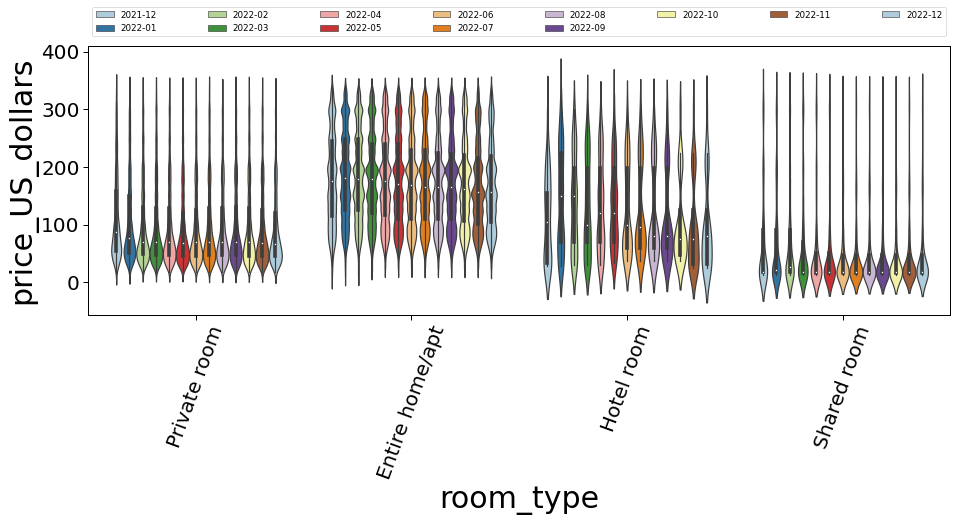

In [31]:
plt.figure(figsize=(14,8))
sns.violinplot(x="room_type", y="price_US_dollars", hue="month_year", data=less_mean_df, palette=pal_3)

ax.set_xlabel("Room type")
ax.set_ylabel("Price in USD")

plt.xticks(fontsize=20, rotation = 70)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(0, 1.02, 1.0,0.2), loc="lower left", mode="expand", ncol=8)
plt.tight_layout()
plt.savefig('Fig_9.png', bbox_inches='tight')
plt.show()

## Summary

## Answers: 

 a) Figure 9 shows the median price increases as 'shared rooms' < 'private rooms' < 'Hotel rooms' < 'Entire home/apt'. The 'shared rooms' median price does not change much throughout the year. The high median price change can be seen in the 'hotel rooms' depending on the month.  
      
   b) The median price depending on the areas in Clark county, the 'City of Las Vegas' and 'City of North Las Vegas' show the lower median price as In Figure 4. However, the lowest median price is shown in 'City of Las Vegas'.   
      
   C)As shown in Figure 8, the median price shows a decrease then followed by an increase for 'City of Las Vegas'. The lowest median housing price is shown in May.  